library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

dataset pada program

In [ ]:
analisis_data = pd.read_csv ('diabetes.csv')
analisis_data.head(10)

NameError: name 'pd' is not defined

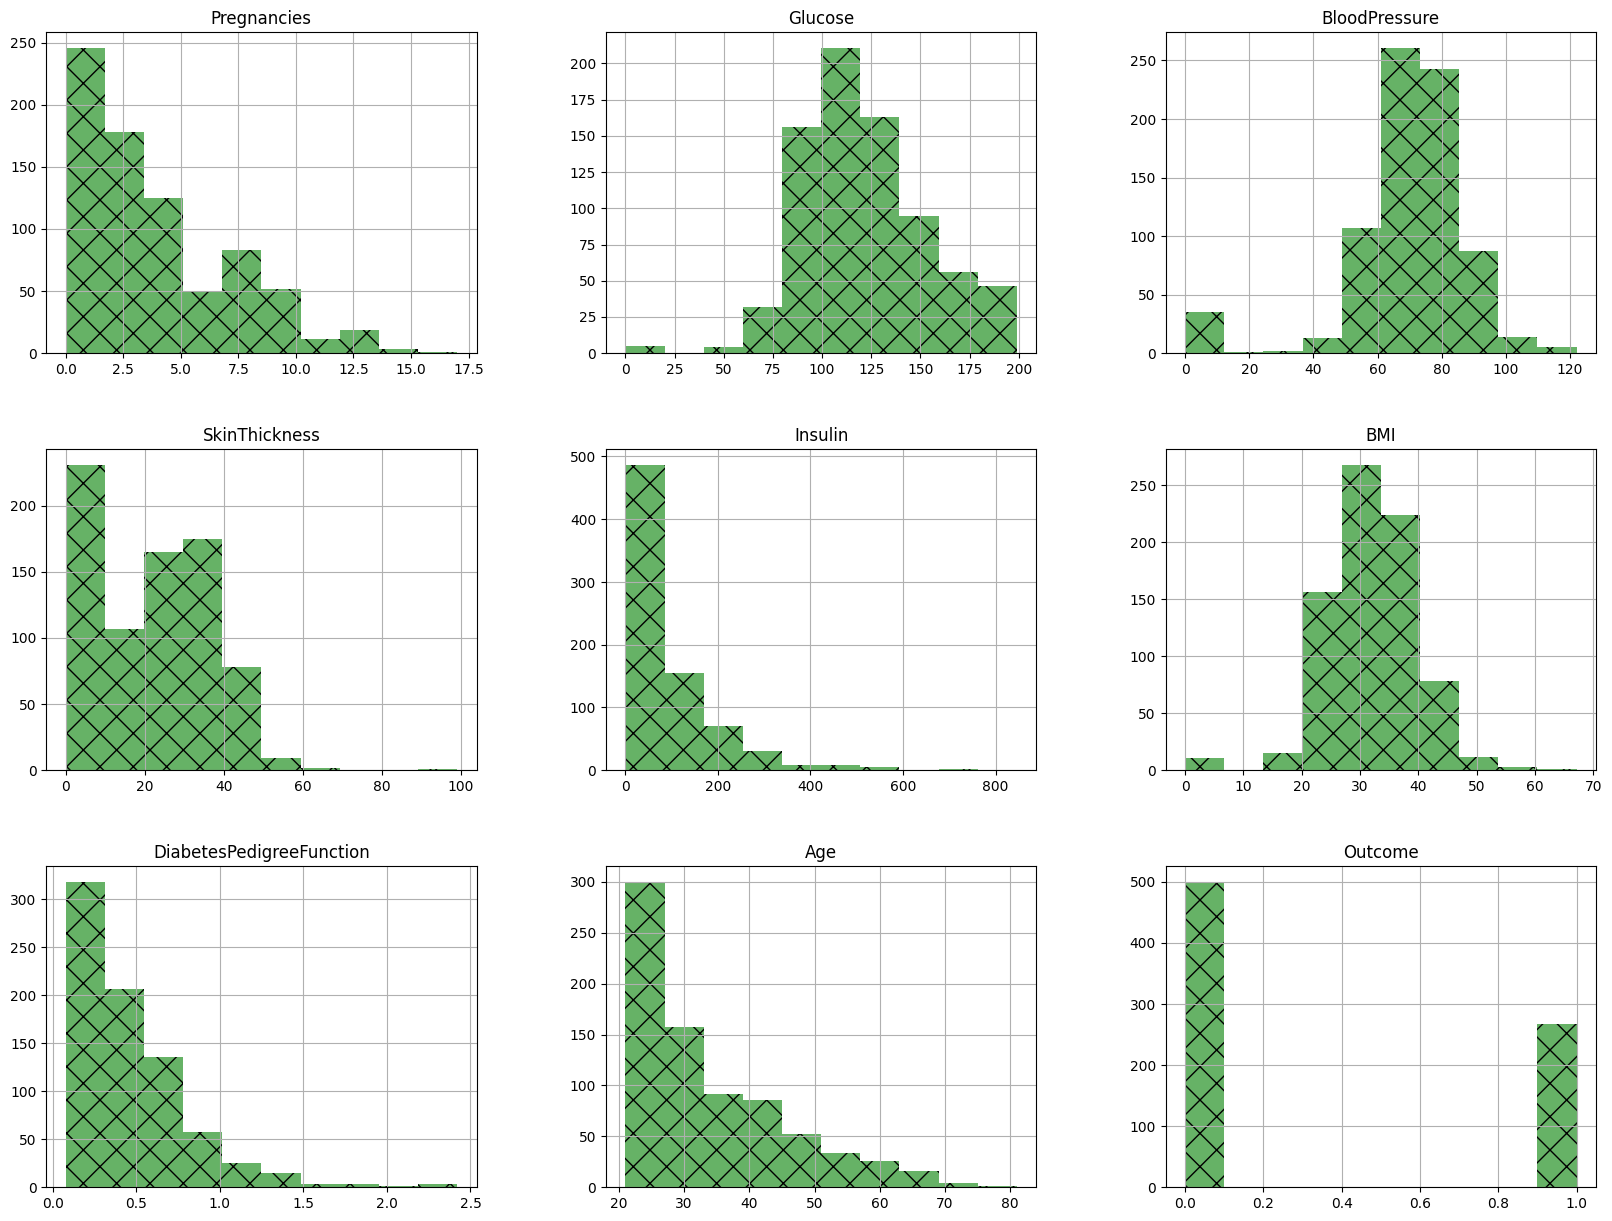

In [ ]:
w = 5
analisis_data.hist(bins=10, figsize=(20,15), color='green', alpha=0.6, hatch='X', rwidth=w);

In [ ]:
data_info = {
    "head": analisis_data.head(),
    "info": analisis_data.info(),
    "describe": analisis_data.describe()
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


{'head':    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 'info': None,
 'describe':        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   3

In [ ]:
categorical_columns = ['Pregnancies', 'Glucose', 'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']

label_encoders = {}  # Simpan encoder untuk decoding nanti jika perlu
for col in categorical_columns:
    le = LabelEncoder()
    analisis_data[col] = le.fit_transform(analisis_data[col])
    label_encoders[col] = le

In [ ]:
X = analisis_data.drop(columns=['Outcome'])  # Fitur
y = LabelEncoder().fit_transform(analisis_data['Outcome'])

In [ ]:
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0              6       86             72             28        0  123   
1              1       23             66             22        0   62   
2              8      121             64              0        0   30   
3              1       27             66             16       62   77   
4              0       75             40             28      102  209   
..           ...      ...            ...            ...      ...  ...   
763           10       39             76             41      108  118   
764            2       60             70             20        0  155   
765            5       59             72             16       71   58   
766            1       64             60              0        0   95   
767            1       31             70             24        0   98   

     DiabetesPedigreeFunction  Age  
0                         350   29  
1                         196   10  
2           

standarisasi dataset

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(X)

In [ ]:
print(standarized_data)

[[ 0.64126653  0.87493656  0.14964075 ...  0.18277812  0.83591289
   1.43289173]
 [-0.84572832 -1.19129395 -0.16054575 ... -0.84049976 -0.24147137
  -0.19033287]
 [ 1.23606446  2.0228424  -0.26394125 ... -1.37730127  0.96184092
  -0.1049    ]
 ...
 [ 0.34386756 -0.0105908   0.14964075 ... -0.90759995 -0.80814751
  -0.27576575]
 [-0.84572832  0.15339575 -0.47073225 ... -0.2869232  -0.24846737
   1.17659311]
 [-0.84572832 -0.92891547  0.04624525 ... -0.23659806 -0.43036342
  -0.87379586]]


In [ ]:
X = standarized_data  # Fitur (misal: data setelah standarisasi)
y = analisis_data['Outcome']  # Label (kolom target)

In [ ]:
print(analisis_data.head())
print(analisis_data.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6       86             72             28        0  123   
1            1       23             66             22        0   62   
2            8      121             64              0        0   30   
3            1       27             66             16       62   77   
4            0       75             40             28      102  209   

   DiabetesPedigreeFunction  Age  Outcome  
0                       350   29        1  
1                       196   10        0  
2                       368   11        1  
3                        53    0        0  
4                       514   12        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=200)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
from sklearn.calibration import LabelEncoder


encoder = LabelEncoder()
categorical_columns = [
    "Pregnancies",
    "Glucose",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    'Age',
    'Outcome',
]

for col in categorical_columns:
    analisis_data[col] = encoder.fit_transform(analisis_data[col])

# Normalisasi kolom numerik
scaler = StandardScaler()
numerical_columns = ['Pregnancies', 'Glucose', 'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
analisis_data[numerical_columns] = scaler.fit_transform(analisis_data[numerical_columns])

# Memeriksa analisis_data setelah preprocessing
print(analisis_data.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.641267  0.874937             72       0.951289 -0.805582  0.182778   
1    -0.845728 -1.191294             66       0.493382 -0.805582 -0.840500   
2     1.236064  2.022842             64      -1.185608 -0.805582 -1.377301   
3    -0.845728 -1.060105             66       0.035476  0.371893 -0.588874   
4    -1.143127  0.514166             40       0.951289  1.131554  1.625432   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.835913  1.432892        1  
1                 -0.241471 -0.190333        0  
2                  0.961841 -0.104900        1  
3                 -1.241900 -1.044662        0  
4                  1.983257 -0.019467        1  


menguji algoritma K Nearest Neigbors

In [ ]:
print("Jumlah data training:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nJumlah data testing:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Jumlah data training:
X_train: (614, 8), y_train: (614,)

Jumlah data testing:
X_test: (154, 8), y_test: (154,)


In [ ]:
X_train_df = pd.DataFrame(X_train, columns=analisis_data.drop(columns=['Outcome']).columns)
print("\nContoh data training (X_train):")
print(X_train_df.head())

print("\nContoh target training (y_train):")
print(y_train[:5])  # Menampilkan 5 baris pertama dari array y_train


Contoh data training (X_train):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.548329  0.645355      -0.574128       0.874971  0.732732 -1.025025   
1     0.046469 -0.600942      -0.470732       0.798653  1.397436 -1.259876   
2    -1.143127  1.924450      -0.160546       1.256560 -0.805582  1.474457   
3    -0.250930 -0.338564      -0.367337      -1.185608 -0.805582 -1.477952   
4     0.046469 -0.732132       0.149641      -0.422431 -0.805582 -0.991475   

   DiabetesPedigreeFunction       Age  
0                  1.059785 -0.788363  
1                  1.626461 -0.019467  
2                  1.969265 -0.702930  
3                 -1.402808 -1.044662  
4                 -0.528307 -0.446631  

Contoh target training (y_train):
63     0
35     0
45     1
190    0
488    0
Name: Outcome, dtype: int64


In [ ]:
print("Dimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

# Menampilkan 5 baris pertama
print("\nContoh Fitur (X):")
print(X[:5])

print("\nContoh Target (y):")
print(y.head())

Dimensi Fitur (X): (768, 8)
Dimensi Target (y): (768,)

Contoh Fitur (X):
[[ 0.64126653  0.87493656  0.14964075  0.951289   -0.80558232  0.18277812
   0.83591289  1.43289173]
 [-0.84572832 -1.19129395 -0.16054575  0.49338242 -0.80558232 -0.84049976
  -0.24147137 -0.19033287]
 [ 1.23606446  2.0228424  -0.26394125 -1.18560839 -0.80558232 -1.37730127
   0.96184092 -0.1049    ]
 [-0.84572832 -1.06010471 -0.16054575  0.03547584  0.37189282 -0.58887405
  -1.24189961 -1.04466161]
 [-1.14312728  0.51416616 -1.50468724  0.951289    1.13155421  1.62543218
   1.98325716 -0.01946713]]

Contoh Target (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
print("\nAkurasi Model kNN:", accuracy)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model kNN: 0.8811881188118812

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       100
           1       0.63      0.63      0.63        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



pengujian algoritma  K Nearest Neingbours

In [ ]:
new_data = [[50, 166, 72, 19, 175, 25.8, 51, 0]]  # Add a placeholder for the missing feature


scaler = StandardScaler()
scaler.fit(X)
new_data = scaler.transform(new_data)


new_prediction = knn.predict(new_data)
print("\nHasil Prediksi untuk Data Baru:", new_prediction)


if new_prediction[0] == 1 :
    print("Diagnosis: Positif Diabetes")
else:
    print("Diagnosis: Negatif Diabetes")


Hasil Prediksi untuk Data Baru: [1]
Diagnosis: Positif Diabetes


In [ ]:
# Data baru dengan nilai yang kemungkinan besar menghasilkan "Negatif Diabetes"
new_data = [[1, 85, 66, 29, 0, 26.6, 0.351, 31]]  # Removed the extra feature

# Standarisasi data baru menggunakan scaler yang telah dilatih
scaler = StandardScaler()
scaler.fit(X)
new_data_scaled = scaler.transform(new_data)  # Changed variable name to new_data_scaled


# Prediksi hasil
new_prediction = knn.predict(new_data_scaled) # Using the scaled data for prediction
print("\nHasil Prediksi untuk Data Baru:", new_prediction)

# Interpretasi hasil prediksi
if new_prediction[0] == 0: # Changed the condition to check for 1 (positive diabetes)
    print("Diagnosis: Positif Diabetes")
else:
    print("Diagnosis: Negatif Diabetes")


Hasil Prediksi untuk Data Baru: [1]
Diagnosis: Negatif Diabetes


In [ ]:
akurasi setiap key akurasi

In [ ]:
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K: {k}, Accuracy: {accuracy_score(y_test, y_pred)}")

K: 3, Accuracy: 0.7272727272727273
K: 5, Accuracy: 0.7402597402597403
K: 7, Accuracy: 0.7532467532467533
K: 9, Accuracy: 0.7662337662337663


menguju algoritma decision tree

In [ ]:
label_encoders = {}
categorical_columns = [
   'Pregnancies', 'Glucose', 'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age', 'Outcome'
]

# Encode setiap kolom kategorikal
for col in categorical_columns:
    le = LabelEncoder()
    analisis_data[col] = le.fit_transform(analisis_data[col])
    label_encoders[col] = le

# Memisahkan fitur (X) dan label (y)
X = analisis_data.drop('Outcome', axis=1)
y = analisis_data['Outcome']

# Membagi dataset menjadi training dan testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melihat bentuk data setelah pembagian
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=500)

tree_data = DecisionTreeClassifier (random_state=500)

tree_data.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=500)

In [ ]:
print(tree_data.score(Xtest, ytest))

0.7012987012987013


In [ ]:
# Periksa jumlah kolom pada dataset
print(f"Jumlah kolom pada dataset: {X_train.shape[1]}")  # Jumlah fitur yang digunakan untuk pelatihan
print(f"Jumlah fitur dalam feature_names: {len(analisis_data.columns)}")  # Jumlah kolom yang diambil dari analisis_data


Jumlah kolom pada dataset: 8
Jumlah fitur dalam feature_names: 9


In [ ]:
from sklearn.tree import export_graphviz

# Gunakan nama fitur langsung dari dataset pelatihan (X_train)
export_graphviz(
    dt_model,
    out_file="tree_stroke.dot",
    class_names=["Tidak Outcome", "Outcome"],
    feature_names=X_train.columns,  # Nama fitur dari dataset pelatihan
    impurity=False,
    filled=True
)


In [ ]:
from sklearn.tree import export_graphviz

# Using the correct feature names from X instead of analisis_data.columns
export_graphviz(
    tree_data,
    out_file="tree_stroke.dot",
    class_names=["1", "0"],
    feature_names=X.columns,  # Use X.columns to get the correct feature names
    impurity=False,
    filled=True
)

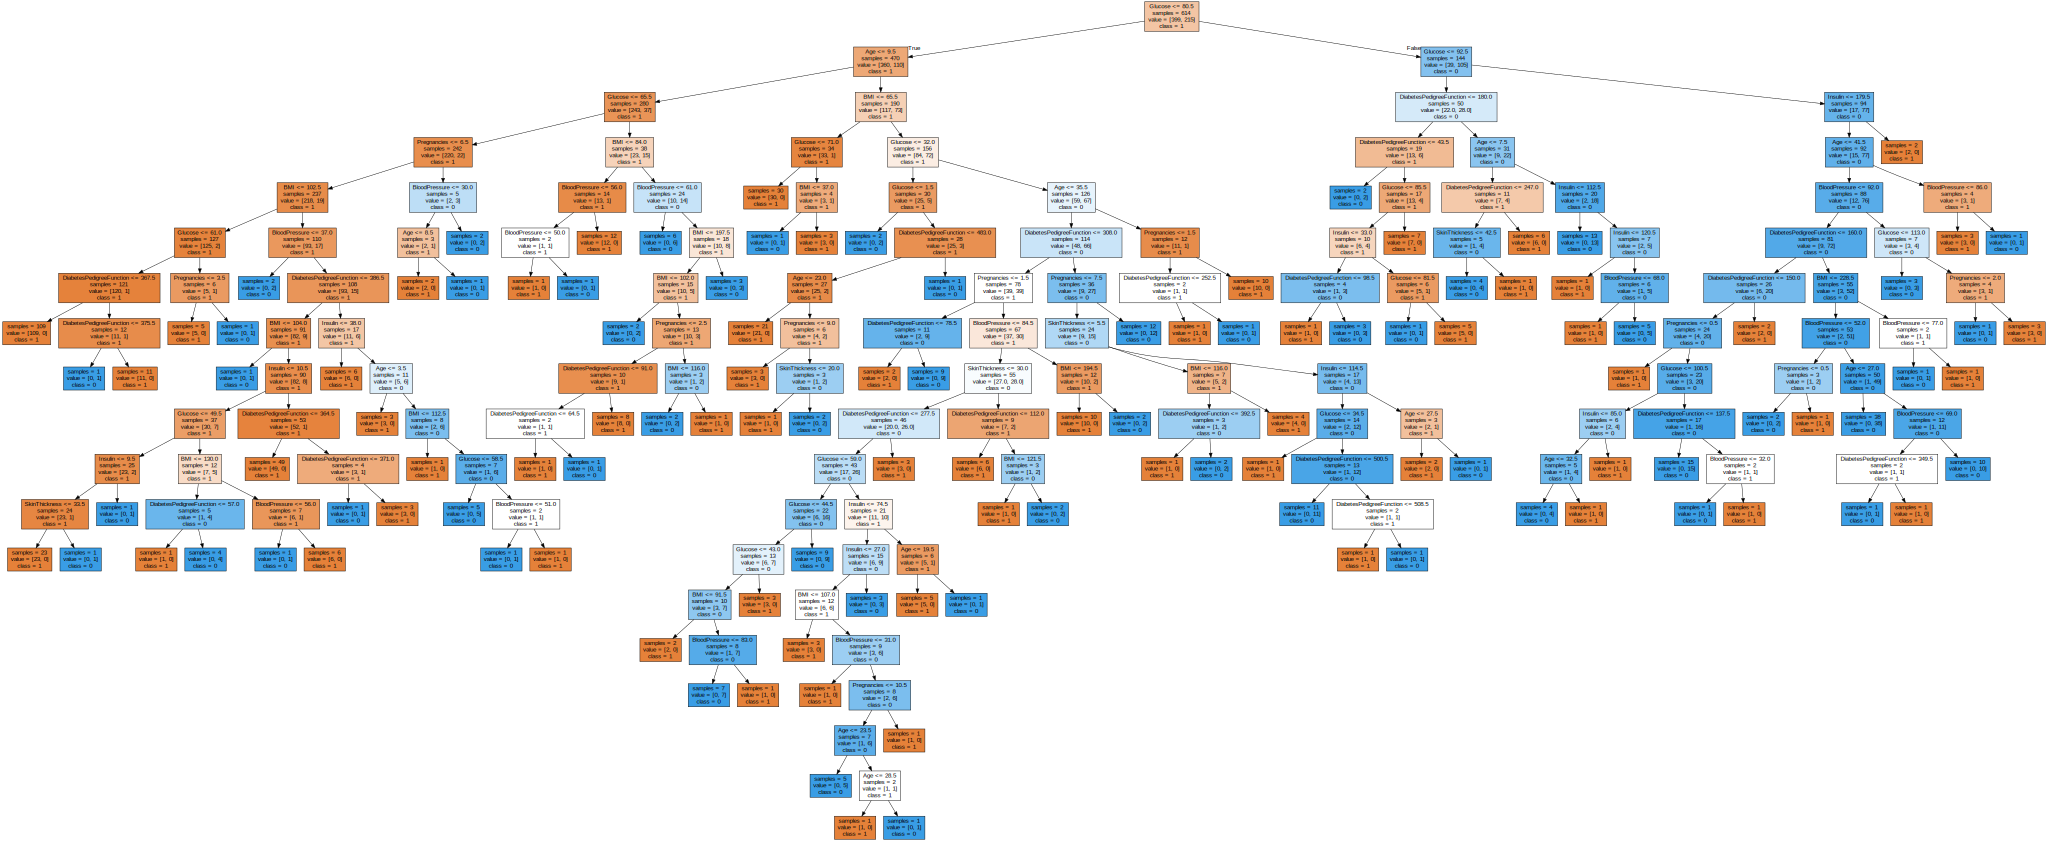

In [ ]:
import graphviz

with open("tree_stroke.dot") as fig: dot_graph = fig.read()

graphviz.Source(dot_graph)

menguji algorita decition tree


In [ ]:
# Memisahkan fitur dan target
# Asumsikan 'Outcome' adalah kolom target berdasarkan dataset diabetes umum
X = analisis_data.drop("Outcome", axis=1)
y = analisis_data["Outcome"]

# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = dt_model.predict(X_test)

Akurasi Model: 0.70
Laporan Evaluasi:
                precision    recall  f1-score   support

Tidak Diabetes       0.81      0.71      0.76       151
      Diabetes       0.56      0.69      0.61        80

      accuracy                           0.70       231
     macro avg       0.68      0.70      0.69       231
  weighted avg       0.72      0.70      0.71       231



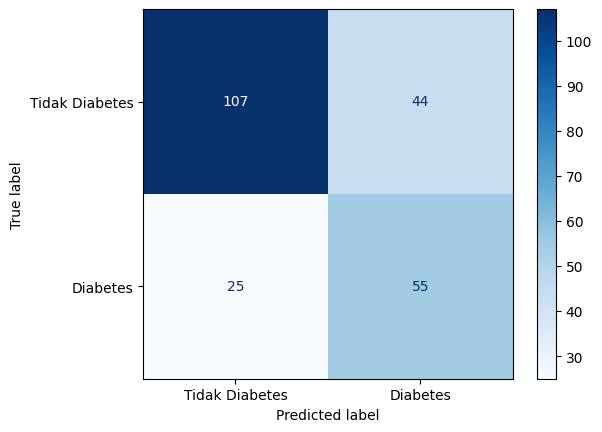

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Laporan klasifikasi
print("Laporan Evaluasi:")
print(classification_report(y_test, y_pred, target_names=["Tidak Diabetes", "Diabetes"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.show()


akurasi algoritma decition tree

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Decision Tree: {accuracy:.2f}")

Akurasi Model Decision Tree: 0.70
